## Unsupervised Learning Part-2

### Domain : Manufacturing 

In [1]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

%matplotlib inline

In [2]:
#Data Import
df = pd.read_excel('Part2 - Company.xlsx');
df.head()

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A


In [3]:
df.shape

(61, 5)

In [4]:
# Copying the dataframe for further use
df_clone = df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


In [6]:
df.isnull().any()

A          False
B          False
C          False
D          False
Quality     True
dtype: bool

In [7]:
# Number of null/missing values
df.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

#### 18 missing values observerd in target variable

In [8]:
# Dropping quality coloumn - target variable
df=df.drop('Quality', axis=1)

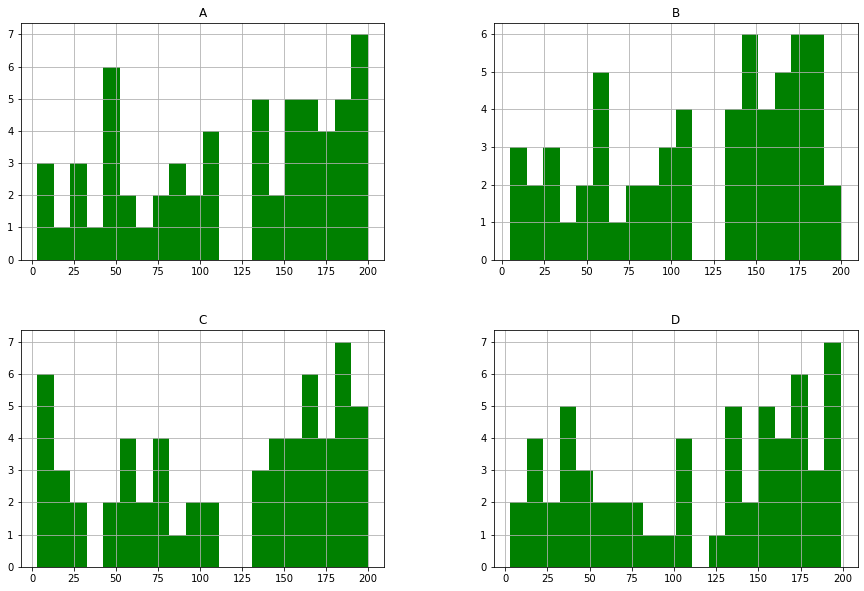

In [9]:
df.hist(bins = 20, figsize = (15, 10), color = 'green')
plt.show()

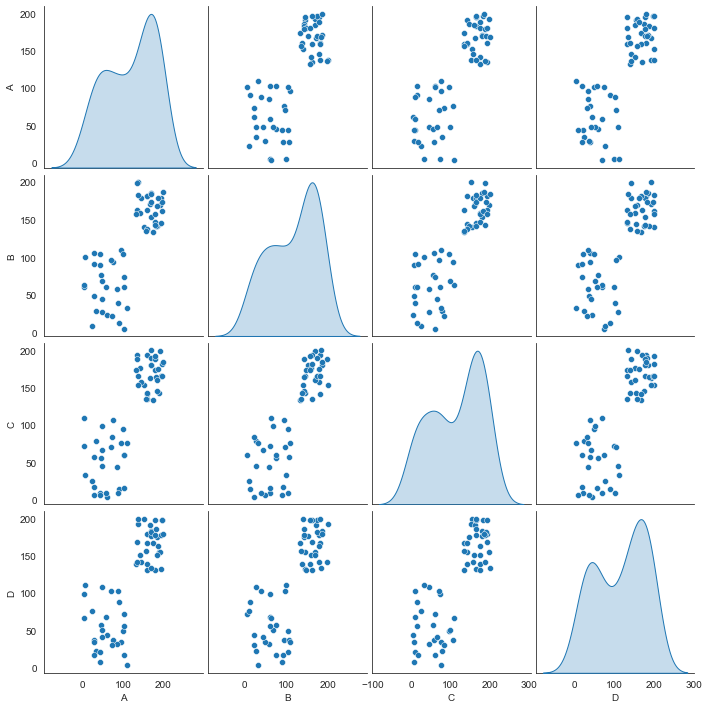

In [10]:
#Bivariate relationships of fields
sns.set_style("white")
sns.pairplot(df, diag_kind='kde')
plt.show()

In [11]:
#scaling the numeric variables
from scipy.stats import zscore
XScaled = df.apply(zscore)
XScaled.head()

,A,B,C,D
0,-1.168034,-1.561080,-1.061569,-0.103138
1,0.904992,0.284923,0.306077,0.823013
2,0.660147,0.807376,0.321443,0.264129
3,-0.939512,-1.630740,-1.706975,-1.125099
4,-0.972158,-0.986381,-1.614775,-0.741864


In [12]:
df_clone.Quality.value_counts()

Quality A    26
Quality B    17
Name: Quality, dtype: int64

In [13]:
#using kmeans-  2 centroids
k_means = KMeans(n_clusters = 2)
k_means.fit(XScaled)
labels = k_means.labels_

silhouette_score(XScaled, labels)

0.6891674125195145

In [14]:
# Appending new cluster attrib to dataset

df_clone["Quality_Cluster"] = labels

In [15]:
df_clone.head(10)

,A,B,C,D,Quality,Quality_Cluster
0,47,27,45,108,Quality A,1
1,174,133,134,166,Quality B,0
2,159,163,135,131,NaN,0
3,61,23,3,44,Quality A,1
4,59,60,9,68,Quality A,1
5,153,140,154,199,NaN,0
6,34,28,78,22,Quality A,1
7,191,144,143,154,NaN,0
8,160,181,194,178,Quality B,0
9,145,178,158,141,NaN,0


In [16]:
# Renaming the label as per the original dataset

df_clone['Quality_Cluster'] = df_clone['Quality_Cluster'].replace({0: 'Quality A', 1: 'Quality B'})


In [17]:
df_clone.shape

(61, 6)

In [18]:
# Dropping null rows
df_clone = df_clone.dropna()
df_clone.shape

(43, 6)

In [19]:
prediction = df_clone['Quality_Cluster']
actual=df_clone['Quality']

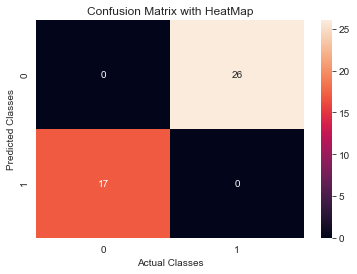

In [20]:
#visualization of confusion matrix in the form of a heatmap
cm= confusion_matrix(actual, prediction)
sns.heatmap(cm, annot = True)
plt.xlabel('Actual Classes')
plt.ylabel('Predicted Classes')
plt.title('Confusion Matrix with HeatMap');

## It is a perfect confusion matrix with no Type I and Type II errors and so the newly predicted values can be used to fill the missing values in Quality column or the new Quality Cluster column can be entire used instead of quality column